In [1]:
from text_analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Data/support_ticket_data.csv', encoding='Windows-1252')
data.head()

,SupportTicketID,CustomerID,DateCreated,DateCompleted,Escalated,Theme,Theme_Desc,Text
0,16582,10007217,30/06/2018,4/7/2018,1,price,cost of the goods to customers. compare to co...,A screwdriver costs over a hundred dollars? Wh...
1,13830,10005984,15/07/2018,18/07/2018,0,speed,consider the delivery speed.,Anyway that I can rush overnight ship my order?
2,53794,10022738,14/10/2018,18/10/2018,0,features,"product features, website features, checkout f...",Are the shelves removable from the wine fridge...
3,95013,10040142,1/11/2018,10/11/2018,0,price,cost of the goods to customers. compare to co...,Are there any Christmas sales coming up?
4,32660,10013924,6/6/2018,6/6/2018,1,design,"product design, website design",Are there any other colors in the bathroom sin...


In [3]:
len(data)

328

## Questions to investigate:
1) How long does it take for a support ticket to be resolved?
      - Grouping by category and looking at response time. 
2) Potential fraudulent support tickets 
      - Look at time, security, services
      - Look at text column maybe classification 
          - Most common words that occur 
      - Why is 35% of the data having a negative process time 
3) What factors influence a ticket to be escalated?
     - Text (topics), theme, date created
4) Classifier which predicts the theme based on the text

In [4]:
data.groupby('Theme').count()[['SupportTicketID']].sort_values('SupportTicketID', ascending = False)

,SupportTicketID
Theme,
speed,77
price,59
features,49
services,34
reliability,31
security,26
support,21
design,18
other,13


In [5]:
data.groupby('Escalated').count()[['SupportTicketID']].sort_values('SupportTicketID', ascending = False)

,SupportTicketID
Escalated,
0,288
1,40


In [6]:
data['DateCompleted'] = pd.to_datetime(data['DateCompleted'])
data['DateCreated'] = pd.to_datetime(data['DateCreated'])
data['Process Time'] = (data['DateCompleted'] - data['DateCreated']).dt.days
data

,SupportTicketID,CustomerID,DateCreated,DateCompleted,Escalated,Theme,Theme_Desc,Text,Process Time
0,16582,10007217,2018-06-30,2018-04-07,1,price,cost of the goods to customers. compare to co...,A screwdriver costs over a hundred dollars? Wh...,-84
1,13830,10005984,2018-07-15,2018-07-18,0,speed,consider the delivery speed.,Anyway that I can rush overnight ship my order?,3
2,53794,10022738,2018-10-14,2018-10-18,0,features,"product features, website features, checkout f...",Are the shelves removable from the wine fridge...,4
3,95013,10040142,2018-01-11,2018-10-11,0,price,cost of the goods to customers. compare to co...,Are there any Christmas sales coming up?,273
4,32660,10013924,2018-06-06,2018-06-06,1,design,"product design, website design",Are there any other colors in the bathroom sin...,0
...,...,...,...,...,...,...,...,...,...
323,123579,10044731,2018-09-21,2018-09-30,0,reliability,"product reliability, website reliability, deli...",Your website is super glitchy. It won't let me...,9
324,101069,10041114,2018-01-12,2018-06-12,0,reliability,"product reliability, website reliability, deli...",Your website keeps crashing and forgetting eve...,151
325,73065,10030954,2018-03-06,2018-05-06,0,reliability,"product reliability, website reliability, deli...",Your website keeps crashing on mobile. It sucks.,61
326,52174,10022074,2018-03-06,2018-03-06,1,features,"product features, website features, checkout f...",Your website's check out system bugs when I us...,0


In [7]:
susProcessTime = data[data['Process Time'] < 0]
normalProcessTime = data[data['Process Time'] >= 0]

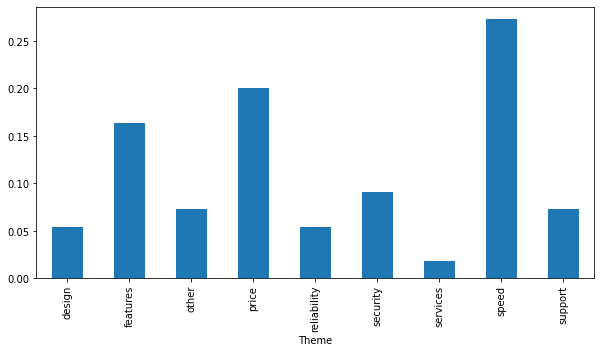

In [8]:
susInter = susProcessTime.groupby('Theme').count()['SupportTicketID'] 
susThemeCounts = susInter / sum(susInter)
plt.figure(figsize = (10, 5))
susThemeCounts.plot(kind = 'bar');

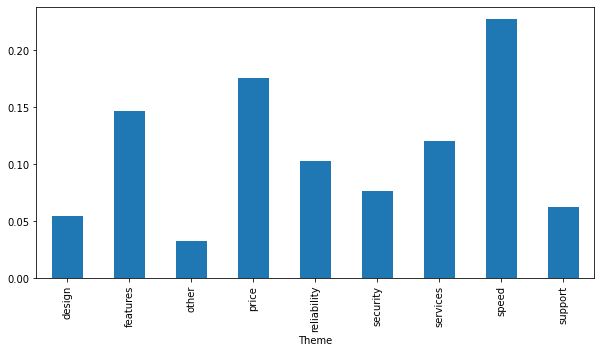

In [9]:
normalInter = normalProcessTime.groupby('Theme').count()['SupportTicketID'] 
normalThemeCounts = normalInter / sum(normalInter)
plt.figure(figsize = (10, 5))
normalThemeCounts.plot(kind = 'bar');

In [10]:
susProcessTime[susProcessTime['Theme'] == 'services']

,SupportTicketID,CustomerID,DateCreated,DateCompleted,Escalated,Theme,Theme_Desc,Text,Process Time
245,84721,10036036,2018-05-31,2018-02-06,0,services,"delivery services, installation services, acco...",The installation team was prompt and polite. ...,-114
